In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Black_data.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
null_count = df.isnull().sum()
print(null_count)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [ ]:
df.drop(["User_ID", "Product_ID"], axis = 1, inplace = True)

In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
data = {
    "attribute": ["Product_Category_2", "Product_Category_3"],
    "% of missing values": [round(df["Product_Category_2"].isnull().sum() / df.shape[0] * 100, 2),
                            round(df["Product_Category_3"].isnull().sum() /df.shape[0] * 100, 2)]
}
missing_values = pd.DataFrame(data=data)
missing_values

,attribute,% of missing values
0,Product_Category_2,31.57
1,Product_Category_3,69.67


In [ ]:
df.drop(["Product_Category_3"], axis = 1, inplace = True)

In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969


In [ ]:
imputer = SimpleImputer(strategy="median")
product_Category_2_imputed = imputer.fit_transform(df[["Product_Category_2"]])
df["Product_Category_2"] = product_Category_2_imputed

In [ ]:
df["Product_Category_2"].head()

,Product_Category_2
0,9.0
1,6.0
2,9.0
3,14.0
4,9.0


In [ ]:
# Calculate the interquartile range (IQR)
q1 =df['Purchase'].quantile(0.25)
q3 = df['Purchase'].quantile(0.75)
iqr = q3 - q1

# Set the lower and upper bounds for outliers
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr

# Remove outliers from the DataFrame
df = df.loc[(df['Purchase'] > low) & (df['Purchase'] < high)]

# Reset the index of the cleaned DataFrame
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,9.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,7969
...,...,...,...,...,...,...,...,...,...
547386,M,51-55,13,B,1,1,20,9.0,368
547387,F,26-35,1,C,3,0,20,9.0,371
547388,F,26-35,15,B,4+,1,20,9.0,137
547389,F,55+,1,C,2,0,20,9.0,365


In [ ]:
for feature in df:
    if len(df[feature].unique()) < 25:
        print(feature, df[feature].unique())

Gender ['F' 'M']
Age ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category ['A' 'C' 'B']
Stay_In_Current_City_Years ['2' '4+' '3' '1' '0']
Marital_Status [0 1]
Product_Category_1 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2 [ 9.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12. 10. 17. 13.  7. 18.]


In [ ]:
ordered_attr = ["Age", "Stay_In_Current_City_Years"]
unordered_attr = ['Gender', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category_1', 'Product_Category_2']

In [ ]:
# function to encode the ordered attributes in the Dataframe
def encodeOrderedAttributes(df, ordered_attr):
    # encode the attributes
    ord_encoder = OrdinalEncoder()
    cat_encoded = ord_encoder.fit_transform(df[ordered_attr])

    # return the new dataframe with encoded attributes
    return pd.DataFrame(cat_encoded, columns=ordered_attr)

# example
encodeOrderedAttributes(df, ordered_attr)

,Age,Stay_In_Current_City_Years
0,0.0,2.0
1,0.0,2.0
2,0.0,2.0
3,0.0,2.0
4,6.0,4.0
...,...,...
547386,5.0,1.0
547387,2.0,3.0
547388,2.0,4.0
547389,6.0,2.0


In [ ]:
# function to encode the uordered attributes in the Dataframe
def encodeUnorderedAttributes(df, unordered_attr):
    # encode the attributes
    hot_encoder = OneHotEncoder()
    cat_encoded = hot_encoder.fit_transform(df[unordered_attr])
    cat_encoded = cat_encoded.toarray()

    # return new dataframe with encoded attributes
    # create the new columns list
    columns = []
    for attribute, category in zip(unordered_attr, hot_encoder.categories_):
        attributeCategories = [f'{attribute}({str(cat)})' for cat in category]
        columns.extend(attributeCategories)

    # the dataframe
    return pd.DataFrame(data=cat_encoded, columns=columns)


# example
encodeUnorderedAttributes(df, unordered_attr)

,Gender(F),Gender(M),Occupation(0),Occupation(1),Occupation(2),Occupation(3),Occupation(4),Occupation(5),Occupation(6),Occupation(7),...,Product_Category_2(9.0),Product_Category_2(10.0),Product_Category_2(11.0),Product_Category_2(12.0),Product_Category_2(13.0),Product_Category_2(14.0),Product_Category_2(15.0),Product_Category_2(16.0),Product_Category_2(17.0),Product_Category_2(18.0)
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547386,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547387,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547388,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547389,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode(df, ordered_attr, unordered_attr):
    ordered_cat = encodeOrderedAttributes(df, ordered_attr)
    unordered_cat = encodeUnorderedAttributes(df, unordered_attr)
    return pd.concat([ordered_cat, unordered_cat], axis=1)

# example
encode(df, ordered_attr, unordered_attr)

,Age,Stay_In_Current_City_Years,Gender(F),Gender(M),Occupation(0),Occupation(1),Occupation(2),Occupation(3),Occupation(4),Occupation(5),...,Product_Category_2(9.0),Product_Category_2(10.0),Product_Category_2(11.0),Product_Category_2(12.0),Product_Category_2(13.0),Product_Category_2(14.0),Product_Category_2(15.0),Product_Category_2(16.0),Product_Category_2(17.0),Product_Category_2(18.0)
0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547386,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547387,2.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547388,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547389,6.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = encode(df, ordered_attr, unordered_attr)
data.head()

,Age,Stay_In_Current_City_Years,Gender(F),Gender(M),Occupation(0),Occupation(1),Occupation(2),Occupation(3),Occupation(4),Occupation(5),...,Product_Category_2(9.0),Product_Category_2(10.0),Product_Category_2(11.0),Product_Category_2(12.0),Product_Category_2(13.0),Product_Category_2(14.0),Product_Category_2(15.0),Product_Category_2(16.0),Product_Category_2(17.0),Product_Category_2(18.0)
0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = data
y = df["Purchase"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((437912, 67), (109479, 67), (437912,), (109479,))

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions for Linear Regression
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate Mean Absolute Error
lr_train_MAE = mean_absolute_error(y_train, y_train_pred)
lr_test_MAE = mean_absolute_error(y_test, y_test_pred)

# Print the results
print(f'train MAE: {lr_train_MAE}\ntest MAE: {lr_test_MAE}')

train MAE: 2256.664128437905
test MAE: 2266.1720358470575


In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()
lasso = Lasso()

In [ ]:
# Define a custom scoring function for MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Define the parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}  # Test multiple alpha values

# Initialize Ridge model
ridge = Ridge()

# Use GridSearchCV to find the best alpha
ridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring=mae_scorer, cv=5)
ridge_cv.fit(X_train, y_train)

# Get the best alpha value
best_alpha = ridge_cv.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

# Train Ridge with the best alpha on the full training data
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

# Make predictions
y_train_pred = best_ridge.predict(X_train)
y_test_pred = best_ridge.predict(X_test)

# Calculate MAE for Ridge regression
ridge_train_MAE = mean_absolute_error(y_train, y_train_pred)
ridge_test_MAE = mean_absolute_error(y_test, y_test_pred)

# Print the results
print(f'train MAE: {ridge_train_MAE}\ntest MAE: {ridge_test_MAE}')

Best alpha: 0.01
train MAE: 2256.6658841946587
test MAE: 2266.17050603417


In [ ]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

param_grid = {'alpha': [0.01]}

lasso = Lasso(max_iter=100)

lasso_cv = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring=mae_scorer, cv=5)
lasso_cv.fit(X_train, y_train)

best_alpha = lasso_cv.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

best_lasso = Lasso(alpha=best_alpha, max_iter=100)
best_lasso.fit(X_train, y_train)

y_train_pred = best_lasso.predict(X_train)
y_test_pred = best_lasso.predict(X_test)

lasso_train_MAE = mean_absolute_error(y_train, y_train_pred)
lasso_test_MAE = mean_absolute_error(y_test, y_test_pred)

print(f'train MAE: {lasso_train_MAE}\ntest MAE: {lasso_test_MAE}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.732e+11, tolerance: 8.539e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.736e+11, tolerance: 8.522e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.735e+11, tolerance: 8.542e

Best alpha: 0.01
train MAE: 2256.682657737096
test MAE: 2266.18788139281


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+11, tolerance: 1.066e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
X_train_samples = X_train.sample(50000, random_state=42)
y_train_samples = y_train.sample(50000, random_state=42)
forest.fit(X_train_samples, y_train_samples)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
forest_train_MAE = mean_absolute_error(y_train, y_train_pred)
forest_test_MAE = mean_absolute_error(y_test, y_test_pred)


print(f'train MAE: {forest_train_MAE}\ntest MAE: {forest_test_MAE}')

train MAE: 2223.4538071475677
test MAE: 2337.856518076574


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
X_train_samples = X_train.sample(50000, random_state=42)
y_train_samples = y_train.sample(50000, random_state=42)
gbr.fit(X_train_samples, y_train_samples)

y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)
gbr_train_MAE = mean_absolute_error(y_train, y_train_pred)
gbr_test_MAE = mean_absolute_error(y_test, y_test_pred)


print(f'train MAE: {gbr_train_MAE}\ntest MAE: {gbr_test_MAE}')

train MAE: 2302.161287611927
test MAE: 2311.1419496111107


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster='gbtree', n_estimator=300, learning_rate=0.45, reg_lambda=1, reg_alpha=0.05)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
xgb_train_MAE = mean_absolute_error(y_train, y_train_pred)
xgb_test_MAE = mean_absolute_error(y_test, y_test_pred)


print(f'train MAE: {xgb_train_MAE}\ntest MAE: {xgb_test_MAE}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:26:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


train MAE: 2136.519093740814
test MAE: 2176.4826015649955


In [ ]:
from sklearn.neural_network import MLPRegressor

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPRegressor(hidden_layer_sizes=(200, 50),  # Adjust architecture as needed
                    max_iter=100,              # Adjust max iterations
                    alpha=0.001,              # Adjust regularization
                    solver='adam',              # Solver (adam is often a good choice)
                    random_state=42,          # Set a random state for reproducibility
                    verbose=True)


mlp.fit(X_train, y_train)

train_pred = mlp.predict(X_train)
test_pred = mlp.predict(X_test)

mlp_train_MAE = mean_absolute_error(y_train, train_pred)
mlp_test_MAE = mean_absolute_error(y_test, test_pred)

print(f"Train MAE: {mlp_train_MAE}")
print(f"Test MAE: {mlp_test_MAE}")

Iteration 1, loss = 10913010.33268380
Iteration 2, loss = 4425758.30039147
Iteration 3, loss = 4385048.05097477
Iteration 4, loss = 4364469.38981003
Iteration 5, loss = 4352261.56400648
Iteration 6, loss = 4341996.01685567
Iteration 7, loss = 4334794.49189775
Iteration 8, loss = 4328165.57266263
Iteration 9, loss = 4323626.03569216
Iteration 10, loss = 4319088.93698530
Iteration 11, loss = 4314154.46181000
Iteration 12, loss = 4309917.38940987
Iteration 13, loss = 4305540.01228353
Iteration 14, loss = 4301522.60349163
Iteration 15, loss = 4297573.11275377
Iteration 16, loss = 4294101.33718241
Iteration 17, loss = 4288880.88817576
Iteration 18, loss = 4285238.12577944
Iteration 19, loss = 4282663.77928921
Iteration 20, loss = 4277366.93849766
Iteration 21, loss = 4274107.46147406
Iteration 22, loss = 4270853.20825131
Iteration 23, loss = 4266768.91687561
Iteration 24, loss = 4263726.39430459
Iteration 25, loss = 4260670.94977669
Iteration 26, loss = 4257278.07537506
Iteration 27, loss =

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Train MAE: 2129.146815192474
Test MAE: 2179.0046874407176


In [ ]:
models_evaluations = {
    'Train_MAE': [lr_train_MAE, ridge_train_MAE, lasso_train_MAE, forest_train_MAE, gbr_train_MAE, xgb_train_MAE, mlp_train_MAE],
    'Test_MAE': [lr_test_MAE, ridge_test_MAE, lasso_test_MAE, forest_test_MAE, gbr_test_MAE, xgb_test_MAE, mlp_test_MAE]
}
models = ['Linear regression', 'Ridge regression', 'Lasso Regression', 'Random forest', 'GradientBoosting regression', 'XGBoost regression', 'Neural Network(MLP)']

models_comparaison_df = pd.DataFrame(data=models_evaluations, index=models)
models_comparaison_df

,Train_MAE,Test_MAE
Linear regression,2256.664128,2266.172036
Ridge regression,2256.665884,2266.170506
Lasso Regression,2256.682658,2266.187881
Random forest,2223.453807,2337.856518
GradientBoosting regression,2302.161288,2311.141950
XGBoost regression,2136.519094,2176.482602
Neural Network(MLP),2129.146815,2179.004687


                               Train_MAE     Test_MAE
Linear regression            2256.664128  2266.172036
Ridge regression             2256.665884  2266.170506
Lasso Regression             2256.682658  2266.187881
Random forest                2223.453807  2337.856518
GradientBoosting regression  2302.161288  2311.141950
XGBoost regression           2136.519094  2176.482602
Neural Network(MLP)          2129.146815  2179.004687


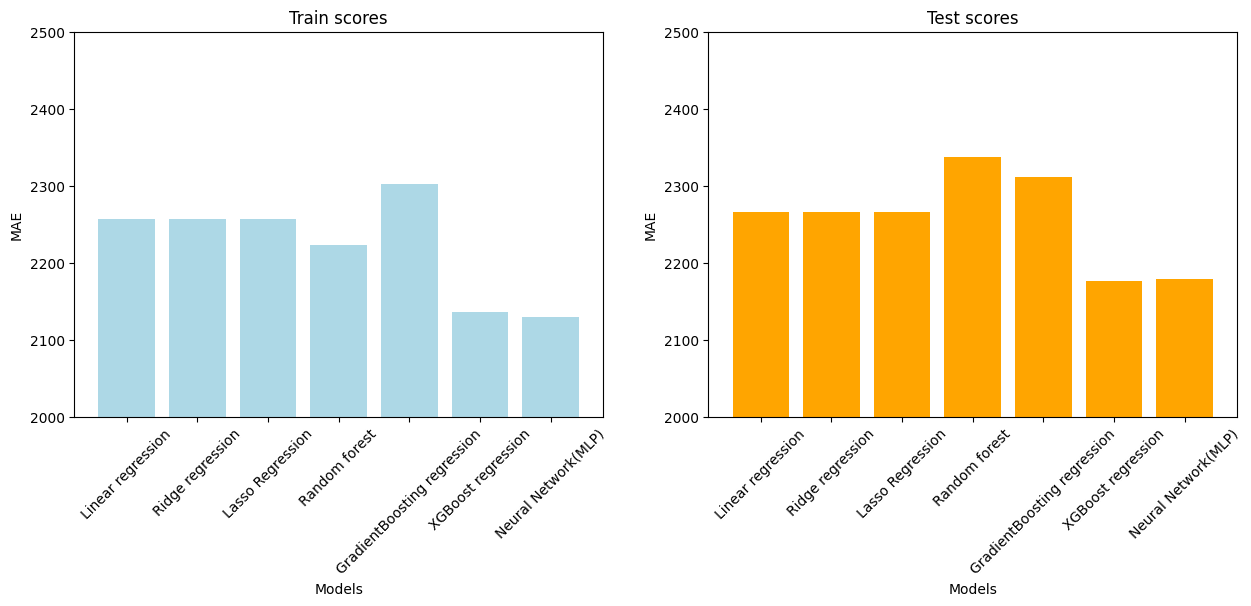

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax0 = axes[0]
ax0.bar(models_comparaison_df.index, height=models_comparaison_df['Train_MAE'], color='lightblue')
ax0.set_title("Train scores")
ax0.set_xlabel('Models')
ax0.set_ylabel('MAE')
ax0.set_xticks(range(len(models_comparaison_df.index)))
ax0.set_xticklabels(models_comparaison_df.index, rotation=45)
ax0.set_ylim([2000, 2500])

ax1 = axes[1]
ax1.bar(models_comparaison_df.index, height=models_comparaison_df['Test_MAE'], color='orange')
ax1.set_title("Test scores")
ax1.set_xlabel('Models')
ax1.set_ylabel('MAE')
ax1.set_xticks(range(len(models_comparaison_df.index)))
ax1.set_xticklabels(models_comparaison_df.index, rotation=45)
ax1.set_ylim([2000, 2500])

print(models_comparaison_df)

#plt.tight_layout()  # Adjust spacing
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300, 400, 500],
}

grid = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'n_estimators': [200, 300, 400, 500]},
             scoring='neg_mean_absolute_error')

In [ ]:
best_nb_estimators = grid.best_params_["n_estimators"]
print(f"best parameter: {best_nb_estimators}, best score: {-grid.best_score_}")

best parameter: 500, best score: 2152.090379473929


In [ ]:
param_grid = {'booster': ['gbtree'],
              'n_estimators': [best_nb_estimators],
              'learning_rate': [0.45, 0.47],
              'reg_lambda': [0.85, 0.9, 0.95],
              'reg_alpha':[0.08, 0.09]
             }

grid = GridSearchCV(estimator=XGBRegressor(),
                    param_grid=param_grid,
                    scoring='neg_mean_absolute_error',
                    cv=None)
grid.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree'], 'learning_rate': [0.45, 0.47],
                         'n_estimators': [500], 'reg_alpha': [0.08, 0.09],
                         'reg_lambda': [0.85, 0.9, 0.95]},
             scoring='neg_mean_absolute_error')

In [ ]:
import pprint

final_params = grid.best_params_
pprint.pprint(final_params)

{'booster': 'gbtree',
 'learning_rate': 0.45,
 'n_estimators': 500,
 'reg_alpha': 0.08,
 'reg_lambda': 0.95}


In [ ]:
print(-grid.best_score_)

2152.627771911682


In [ ]:
final_xgb = XGBRegressor(**final_params)
final_xgb.fit(X_train, y_train)

y_train_pred = final_xgb.predict(X_train)
y_test_predict = final_xgb.predict(X_test)
train_MAE = mean_absolute_error(y_train, y_train_pred)
test_MAE = mean_absolute_error(y_test, y_test_pred)

print(f"final train MAE: {train_MAE}\nfinal test MAE: {test_MAE}")

final train MAE: 2054.128714953446
final test MAE: 2176.4826015649955


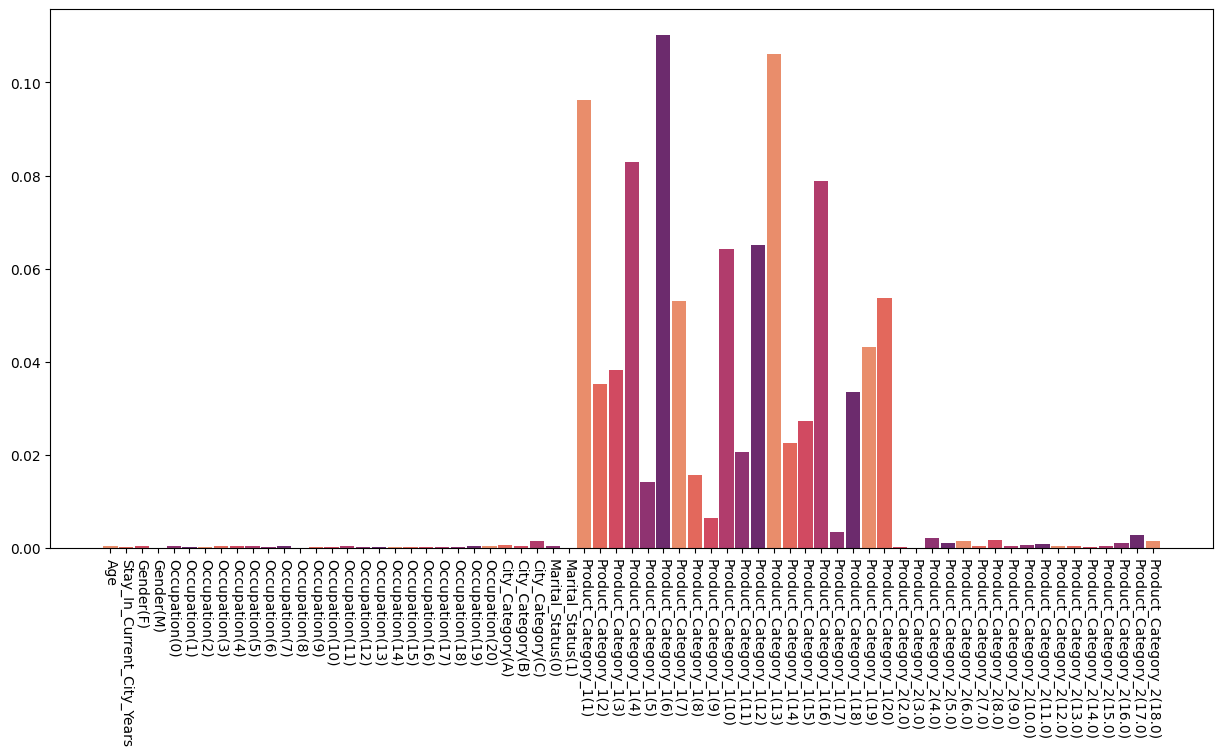

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 7), dpi=100)
palette = sns.color_palette("flare")
plt.bar(x=xgb.feature_names_in_, height=xgb.feature_importances_, width=0.9, color=palette)

plt.xticks(rotation=-90)
plt.show()